In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [2]:
circuit = QuantumCircuit(3, 3)

## Encoding the quantum state to be teleported.

In [3]:
# |->
circuit.x(0)
circuit.h(0)
circuit.barrier()
circuit.draw()

┌───┐┌───┐ ░ 
q_0: ┤ X ├┤ H ├─░─
     └───┘└───┘ ░ 
q_1: ───────────░─
                ░ 
q_2: ───────────░─
                ░ 
c: 3/═════════════

In [4]:
# Entangle q1 and q2
circuit.h(1)
circuit.cx(1,2)
circuit.draw()

┌───┐┌───┐ ░           
q_0: ┤ X ├┤ H ├─░───────────
     └───┘└───┘ ░ ┌───┐     
q_1: ───────────░─┤ H ├──■──
                ░ └───┘┌─┴─┐
q_2: ───────────░──────┤ X ├
                ░      └───┘
c: 3/═══════════════════════

[ 0.5-6.123234e-17j -0.5+6.123234e-17j  0. +0.000000e+00j
  0. +0.000000e+00j  0. +0.000000e+00j  0. +0.000000e+00j
  0.5-6.123234e-17j -0.5+6.123234e-17j]


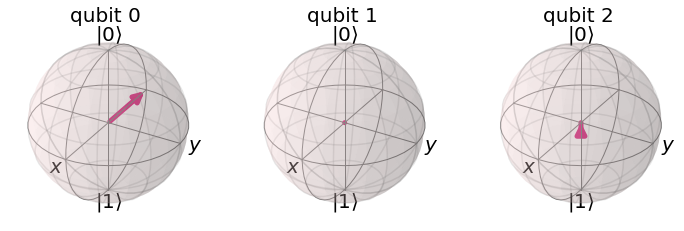

In [5]:
from qiskit.tools.visualization import plot_bloch_multivector
simulator = Aer.get_backend('statevector_simulator')

result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_(statevector)

In [6]:
circuit.barrier()
circuit.cx(0, 1)
circuit.h(0)
circuit.draw()

┌───┐┌───┐ ░            ░      ┌───┐
q_0: ┤ X ├┤ H ├─░────────────░───■──┤ H ├
     └───┘└───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘
q_1: ───────────░─┤ H ├──■───░─┤ X ├─────
                ░ └───┘┌─┴─┐ ░ └───┘     
q_2: ───────────░──────┤ X ├─░───────────
                ░      └───┘ ░           
c: 3/════════════════════════════════════

[ 0.35355339-4.32978028e-17j  0.35355339-4.32978028e-17j
 -0.35355339+8.65956056e-17j  0.35355339-8.65956056e-17j
 -0.35355339+8.65956056e-17j  0.35355339-8.65956056e-17j
  0.35355339-4.32978028e-17j  0.35355339-4.32978028e-17j]


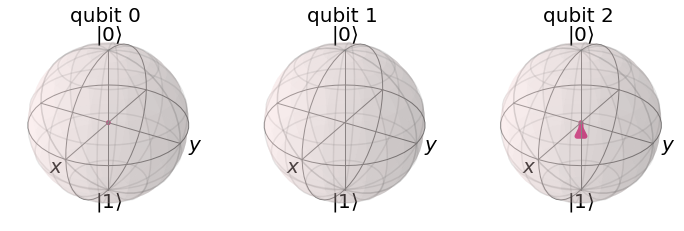

In [7]:
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [8]:
circuit.barrier()
circuit.measure([0,1], [0,1])
circuit.draw()

┌───┐┌───┐ ░            ░      ┌───┐ ░ ┌─┐   
q_0: ┤ X ├┤ H ├─░────────────░───■──┤ H ├─░─┤M├───
     └───┘└───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ───────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├
                ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
q_2: ───────────░──────┤ X ├─░────────────░──╫──╫─
                ░      └───┘ ░            ░  ║  ║ 
c: 3/════════════════════════════════════════╩══╩═
                                             0  1

In [9]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw()

┌───┐┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├┤ H ├─░────────────░───■──┤ H ├─░─┤M├────░───────■─
     └───┘└───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ───────────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼─
                ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ───────────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■─
                ░      └───┘ ░            ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════════════╩══╩════════════
                                             0  1

[ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
  0.        +0.00000000e+00j  0.70710678-8.65956056e-17j
 -0.        +0.00000000e+00j -0.        +0.00000000e+00j
 -0.        +0.00000000e+00j -0.70710678+1.73191211e-16j]


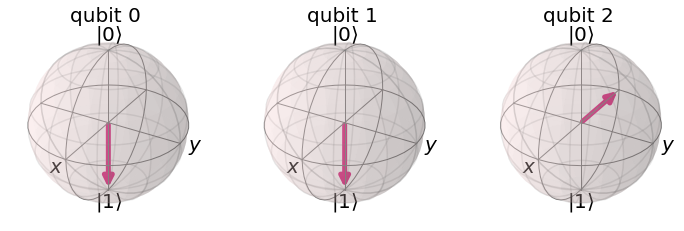

In [10]:
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

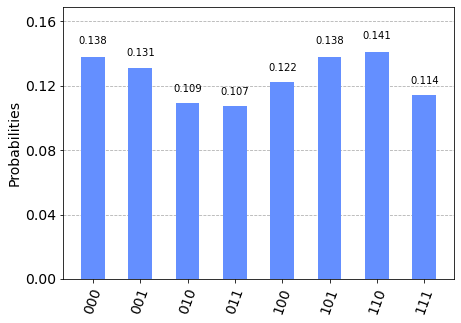

In [11]:
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
plot_histogram(result.get_counts())